In [1]:
import tensorflow as tf
#import fashion_mnist from keras.datasets.fashion_mnist
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Getting DATA ready


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Sample

9


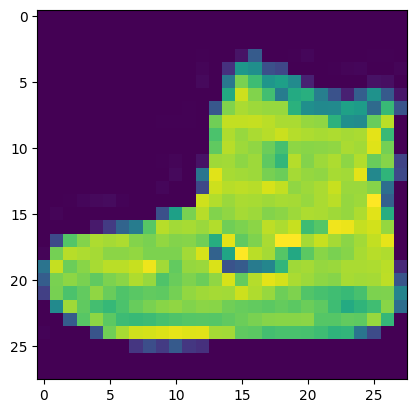

In [3]:
plt.imshow(train_images[0])
print(train_labels[0])


Building the model and compiling it

In [ ]:
#eval

In [6]:
#Multi Class Classification Model
tf.random.set_seed(42)  # for reproducibility

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(784, activation=tf.nn.relu),
    tf.keras.layers.Dense(196, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

#Fit the model
non_norm_history =model.fit(train_images, train_labels, epochs=5,validation_data=(test_images, test_labels))

#history
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.show()

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 3.4620 - accuracy: 0.7124 - val_loss: 0.6143 - val_accuracy: 0.8065
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6389 - accuracy: 0.7789 - val_loss: 0.7233 - val_accuracy: 0.7645
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.6066 - accuracy: 0.7972 - val_loss: 0.8381 - val_accuracy: 0.6833
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5885 - accuracy: 0.8049 - val_loss: 0.5916 - val_accuracy: 0.8126
Epoch 5/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.6001 - accuracy: 0.8033 - val_loss: 0.5809 - val_accuracy: 0.8086


In [7]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.5809 - accuracy: 0.8086
Test accuracy: 0.8086000084877014


CONFUSION MATRIX

313/313 [==============================] - 1s 3ms/step


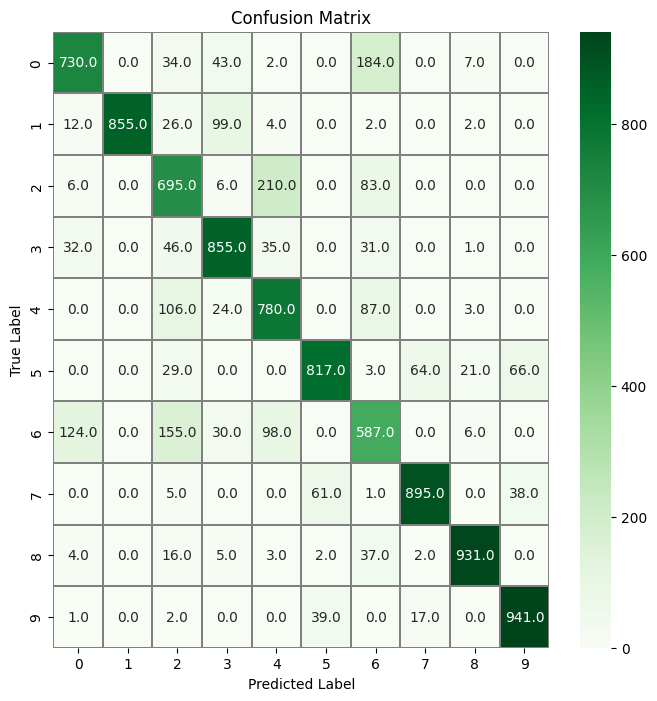

In [14]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(test_images)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=test_labels
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt=".1f",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
